# Comets of Wall Street
In this workshop, you will:
- pull in data from Yahoo Finance for a stock that's assigned to you
- view and analyze that data using Pandas and Matplotlib
- determine if a stock is overvalued based on various metrics
- create an infographic showing the the stock's trends and whether you think it's overvalued
- create a pull request to make it viewable on the workshop's website

## Part I: Pull in Data From Yahoo Finance

For this workshop, we'll be using the `yfinance` *library* to retrieve data from Yahoo Finance.

A *library* is an easily-reusable unit of code that does something for you. You can read more about libraries on TrackIT!

Since the library we need might not be installed on the machine you're running it on, let's install it:

In [4]:
# The exclamation mark signifies that we're running a terminal command
# Don't worry about the specifics of this command, just know it installs the yfinance library
!pip3 install --upgrade --force-reinstall yfinance

Processing /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c/yfinance-0.1.55-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/1e/0c169c6a5381e241ba7404532c16a21d86ab872c9bed8bdcd4c423954103/requests-2.24.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/97/af8a92864a04bfa48f1b5c9b1f8bf2ccb2847f24530026f26dd223de4ca0/numpy-1.19.2-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a2/21/e10d65222d19a2537e3eb0df306686a9eabd08b3c98dd120e43720bf802d/pandas-1.1.3-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/37/fa/73/d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677/multitasking-0.0.9-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/49/f7c5f4ec1913f37a2ecab69c42f95397416606b35ec3ed9373cc456833de/lxml-4.6.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562

Now that we've made sure it's installed, let's pull it into our project:

In [5]:
import yfinance as yf

Awesome. All the methods and properties inside the library are now inside the variable `yf`.

To access something inside the library, we use the dot operator. For example, this is a method inside the package: `yf.download`.

Now, it's time to download our stock's data using this `yfinance` library. Create a variable called `ticker` below that contains a string of your stock's ticker:

In [6]:
# replace this line with the variable described above!
ticker = 'JBLU' 

Let's create a `yf.Ticker` object using the `yf.Ticker(ticker)` method using the variable we just declared:

In [7]:
# create a yf.Ticker object using the variable you just created above!
my_stock = yf.Ticker(ticker)

Let's use that to get some basic info about the stock and store it in a variable called `stock_info`, using the `info` property on our Ticker object created above.

In [8]:
stock_info = my_stock.info
stock_info

{'52WeekChange': -0.3013699,
 'SandP52WeekChange': 0.1586746,
 'address1': '27-01 Queens Plaza North',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 12.2,
 'askSize': 39400,
 'averageDailyVolume10Day': 8147750,
 'averageVolume': 8960413,
 'averageVolume10days': 8147750,
 'beta': 1.44236,
 'beta3Year': None,
 'bid': 12.15,
 'bidSize': 21500,
 'bookValue': 15.028,
 'category': None,
 'circulatingSupply': None,
 'city': 'Long Island City',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1601424000,
 'dayHigh': 12.48,
 'dayLow': 12.21,
 'dividendRate': None,
 'dividendYield': None,
 'earningsQuarterlyGrowth': None,
 'enterpriseToEbitda': 46.073,
 'enterpriseToRevenue': 1.012,
 'enterpriseValue': 5989492736,
 'exDividendDate': None,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fax': '718 709 3631',
 'fiftyDayAverage'

You can see above that there's multiple strings mapped to values with a colon. This is called a `dictionary` in Python. Let's get some (basic) useful stuff from this dictionary!

To get values from a dictionary, you just use the name of the dictionary along with a string (called a `key`) of the value you want. For example, to get the `shortRatio` of our stock, we would type in `stock_info['shortRatio']`. Let's try getting the following useful values from our `stock_info` dictionary:

- logo_url
- sector
- industry
- shortName
- pegRatio
- trailingEps
- forwardEps
- previousClose

You can read more about dictionaries on TrackIT!

In [9]:
logo_url = stock_info['logo_url']
sector = stock_info['sector']
industry = stock_info['industry']
shortName = stock_info['shortName']
pegRatio = stock_info['pegRatio']
trailingEps = stock_info['trailingEps']
forwardEps = stock_info['forwardEps']
previousClose = stock_info['previousClose']

Using some of this, let's print a short, human-readable summary about this stock:

In [10]:
# This uses a feature called string interpolation, which you can read about on TrackIT.
f'{shortName} (ticker: {my_stock.ticker}) is a {sector} stock in the {industry} industry. It recently closed at ${previousClose} per share. Some useful metrics to know about this stock are its PEG ratio, which is {pegRatio} and has a trailing and forward EPS of {trailingEps} and {forwardEps}, respectively.'

'JetBlue Airways Corporation (ticker: JBLU) is a Industrials stock in the Airlines industry. It recently closed at $12.31 per share. Some useful metrics to know about this stock are its PEG ratio, which is 0.12 and has a trailing and forward EPS of -0.853 and -0.37, respectively.'

Perfect! Now let's get the price history of this stock for the last year. we'll do this using a new method from the `yfinance` library: `yf.download(ticker_symbol)` with the optional parameter `period`. Let's get data for the year to date (or `'ytd'`):

In [11]:
price_history = yf.download(ticker, period='ytd') # fill in the rest here!
price_history

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,18.900000,19.059999,18.820000,18.889999,18.889999,3199400
2020-01-03,18.570000,18.629999,18.100000,18.570000,18.570000,5434300
2020-01-06,18.350000,18.520000,18.309999,18.480000,18.480000,2834300
2020-01-07,18.469999,18.559999,18.270000,18.410000,18.410000,2662500
2020-01-08,18.290001,18.770000,18.200001,18.500000,18.500000,5177900
...,...,...,...,...,...,...
2020-10-12,12.700000,12.740000,12.340000,12.370000,12.370000,7105300
2020-10-13,12.150000,12.270000,12.010000,12.140000,12.140000,6569600
2020-10-14,12.200000,12.470000,12.200000,12.300000,12.300000,4810600


That's all the data we'll need for our workshop! Now, let's play around with this data using Python.

## Part II: View and Analyze Data Using Pandas and Matplotlib

We're presented with a table of dates, opening prices, daily highs and lows, closing pricces, adjusted closing prices, and trading volume for each day. The type of object this data is stored in is called a Pandas `DataFrame`, which is used a lot within data science and machine learning to work with tabular data (i.e. data that is in a table format). You can access each column similar to how you accessed a specific value in the dictionary by key (but keep in mind a DataFrame is *not* a dictionary). You can read more about DataFrames on TrackIT!

<center><img src="https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png" width="700" /></center>

Let's access the Close price data from the DataFrame:

In [12]:
# access Close price data from DataFrame!
price_history['Close']

Date
2020-01-02    18.889999
2020-01-03    18.570000
2020-01-06    18.480000
2020-01-07    18.410000
2020-01-08    18.500000
                ...    
2020-10-12    12.370000
2020-10-13    12.140000
2020-10-14    12.300000
2020-10-15    12.310000
2020-10-16    12.240000
Name: Close, Length: 201, dtype: float64

As mentioned earlier, we can easily manipulate and analyze the data within Pandas. Let's get the average closing price of our stock within the past year by calling the `.mean()` method on the column access by name:

In [13]:
# get the mean close price!
price_history['Close'].mean()

12.498805964170996

We can even use the Python built-in methods like `max()` and `min()` to get the minimum and maximum close price! Just pass in the column as the parameter in these methods:

In [14]:
# try printing the max and min of the closing price!
print('max', price_history['Close'].max())
print('min', price_history['Close'].min())

max 21.559999465942383
min 6.860000133514404


Learn more about element-wise operations on TrackIT!

Just how we can analyze data in-place, we can also create new columns with computed values on-the-fly. Let's create a new column that'll tell us the absolute difference between opening and closing stock prices:

In [15]:
price_history['Diff'] = abs(price_history['Close'] - price_history['Open'])
price_history

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2020-01-02,18.900000,19.059999,18.820000,18.889999,18.889999,3199400,0.010000
2020-01-03,18.570000,18.629999,18.100000,18.570000,18.570000,5434300,0.000000
2020-01-06,18.350000,18.520000,18.309999,18.480000,18.480000,2834300,0.129999
2020-01-07,18.469999,18.559999,18.270000,18.410000,18.410000,2662500,0.059999
2020-01-08,18.290001,18.770000,18.200001,18.500000,18.500000,5177900,0.209999
...,...,...,...,...,...,...,...
2020-10-12,12.700000,12.740000,12.340000,12.370000,12.370000,7105300,0.330000
2020-10-13,12.150000,12.270000,12.010000,12.140000,12.140000,6569600,0.009999
2020-10-14,12.200000,12.470000,12.200000,12.300000,12.300000,4810600,0.100000


We can then use this column to find the day when the difference between opening and closing was the highest using the `max()` method learned before and a new method called `loc`:

Learn how `.loc` works on TrackIT!

In [16]:
max_diff = max(price_history['Diff'])
# in the square brackets, put the name of the diff column `==` the max_diff above.
price_history.loc[price_history['Diff'] == max_diff]

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2020-06-05,15.1,15.51,13.32,13.69,13.69,48444800,1.410001


One of the most common visualizations that come to mind when it comes to any traded equities is a graph of its price over time. A library called Matplotlib makes it really easy to create good-looking graphs that show off your data.

Let's pull in matplotlib:

In [17]:
# Install matplotlib
!pip3 install --upgrade matplotlib
# Import matplotlib
import matplotlib.pyplot as plt

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.2)


Let's use the `plt.plot` method to graph the date on the x-axis and the closing price on the y-axis. Let's also graph the absolute difference between the opening and closing values:

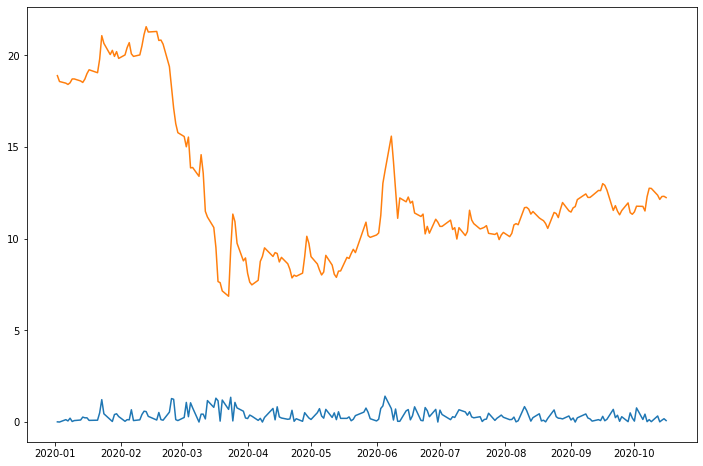

In [18]:
# Make our graphs wide enough to display all data
plt.figure(figsize=(12,8))
# Plot graph using plt.plot(x, y). Try it!
plt.plot(price_history.index, price_history['Diff'])
plt.plot(price_history.index, price_history['Close'])

Let's take a closer look at recent performance of our stock, for the past 14 days.

In order to do that, we first need to get the last 14 entries from our `price_history` DataFrame, clear the matplotlib figure using `.clf()`, and then plot it again.

<Figure size 432x288 with 0 Axes>

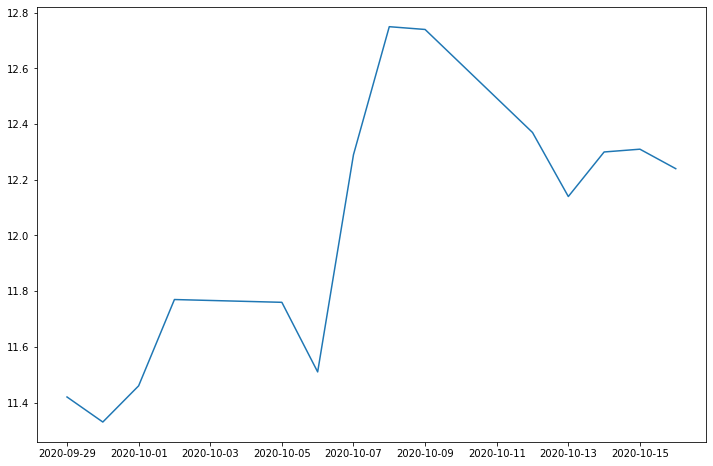

In [19]:
# Get the last 7 using DataFrame slicing!
last_week = price_history[-14:]
# Clear the figure
plt.clf()
# Make our graphs wide enough to display all data
plt.figure(figsize=(12,8))
# Plot it again
plt.plot(last_week.index, last_week['Close'])

What kinds of determinations can you make based on the historical price of the stock and the recent performance of the stock? Write 1-2 lines or less of observations down in the string below.

In [21]:
# Fill in the blank string!
price_analysis = 'The stock price went up a few days ago but has gone down since then.'

Now that we've done some basic data analysis, let's use some metrics that we got from Yahoo Finance to determine if the stock is overvalued!

## Part III: Determining If A Stock Is Overvalued

This is a section filled with a bit of jargon. Don't worry, we'll try to go over it at a high level.

Investors use key metrics to determine if a stock is worth investing in, such as **PEG Ratio**, **EPS**, and general industry/stock trends (among other things). One thing to keep in mind that none of this is an exact science, and even the best hedge funds can only offer a 7-9% return on investment.


### PEG Ratios
The **PEG ratio**, which is short for Price over Earnings-to-Growth ratio, is a ratio of how much a stock is priced compared how much a company makes (adjusted for growth). A low PEG ratio will tell you that the stock is trading lower than how much the company makes, and a really high PEG ratio tells you that the stock is trading much higher than what the company makes.

A stock with a high PEG ratio could suggest that the stock is being held up by hype or market speculation on their long-term future growth. A low PEG ratio could tell you that a stock may be underrated (however, in a real scenario, it's a good idea to do more research, since there may be a major reason why the stock is trading so low).

See TrackIT for more resources on the PEG ratio!

Let's view the PEG ratio of our stock:


In [22]:
# print pegRatio!
print(pegRatio)

0.12


A negative PEG ratio may mean the growth of the company is negative. While not an explicit warning to stay away from the stock, keep in mind low company growth leads to stock price drops long-term.

When considering PEG ratios, also consider the sector the stock is in. Tech is a high-growth sector, while oil and gas isn't really the definition of growth.

### EPS Ratio

The **EPS**, or the Earnings Per Share, tells you the amount of money a company made per stock it has issued. As indicated by Investopedia:

> A higher EPS indicates greater value because investors will pay more for a company's shares if they think the company has higher profits relative to its share price.

For more resources on the EPS ratio, see TrackIT!

With the data from Yahoo Finance, we've gotten two EPS values, a *trailing* EPS and a *forward* EPS. The trailing EPS is based on historical earnings, while the forward EPS is based on earnings forecasts.

Let's print both EPS values:

In [23]:
# print both trailingEps and forwardEps!
print(trailingEps)
print(forwardEps)

-0.853
-0.37


Now, using those two metrics, it's time to make a determination on whether or not you think the stock's overvalued!

Keep in mind that this is largely opinion-based but still backed by metrics. Many analysts disagree on whether a stock is currently overvalued or not, so it's totally fine if you get it wrong. After all, you're just getting started with stock analysis!

Here's some factors to consider:
- Is the PEG high or low? And is the EPS or the industry it's in high-growth enough to support that PEG?
- How has the stock been doing recently (look at the graph you made above)? Has there been any growth in either direction to support the PEG?
- How's the industry the stock is in doing in general? For example, biotech is on fire right now given how rapid vaccine development is occurring.

In [27]:
# change this to True or False based on your determination!
overvalued = False
# enter your discord tag here!
discord_tag = 'vmm190002#0372'

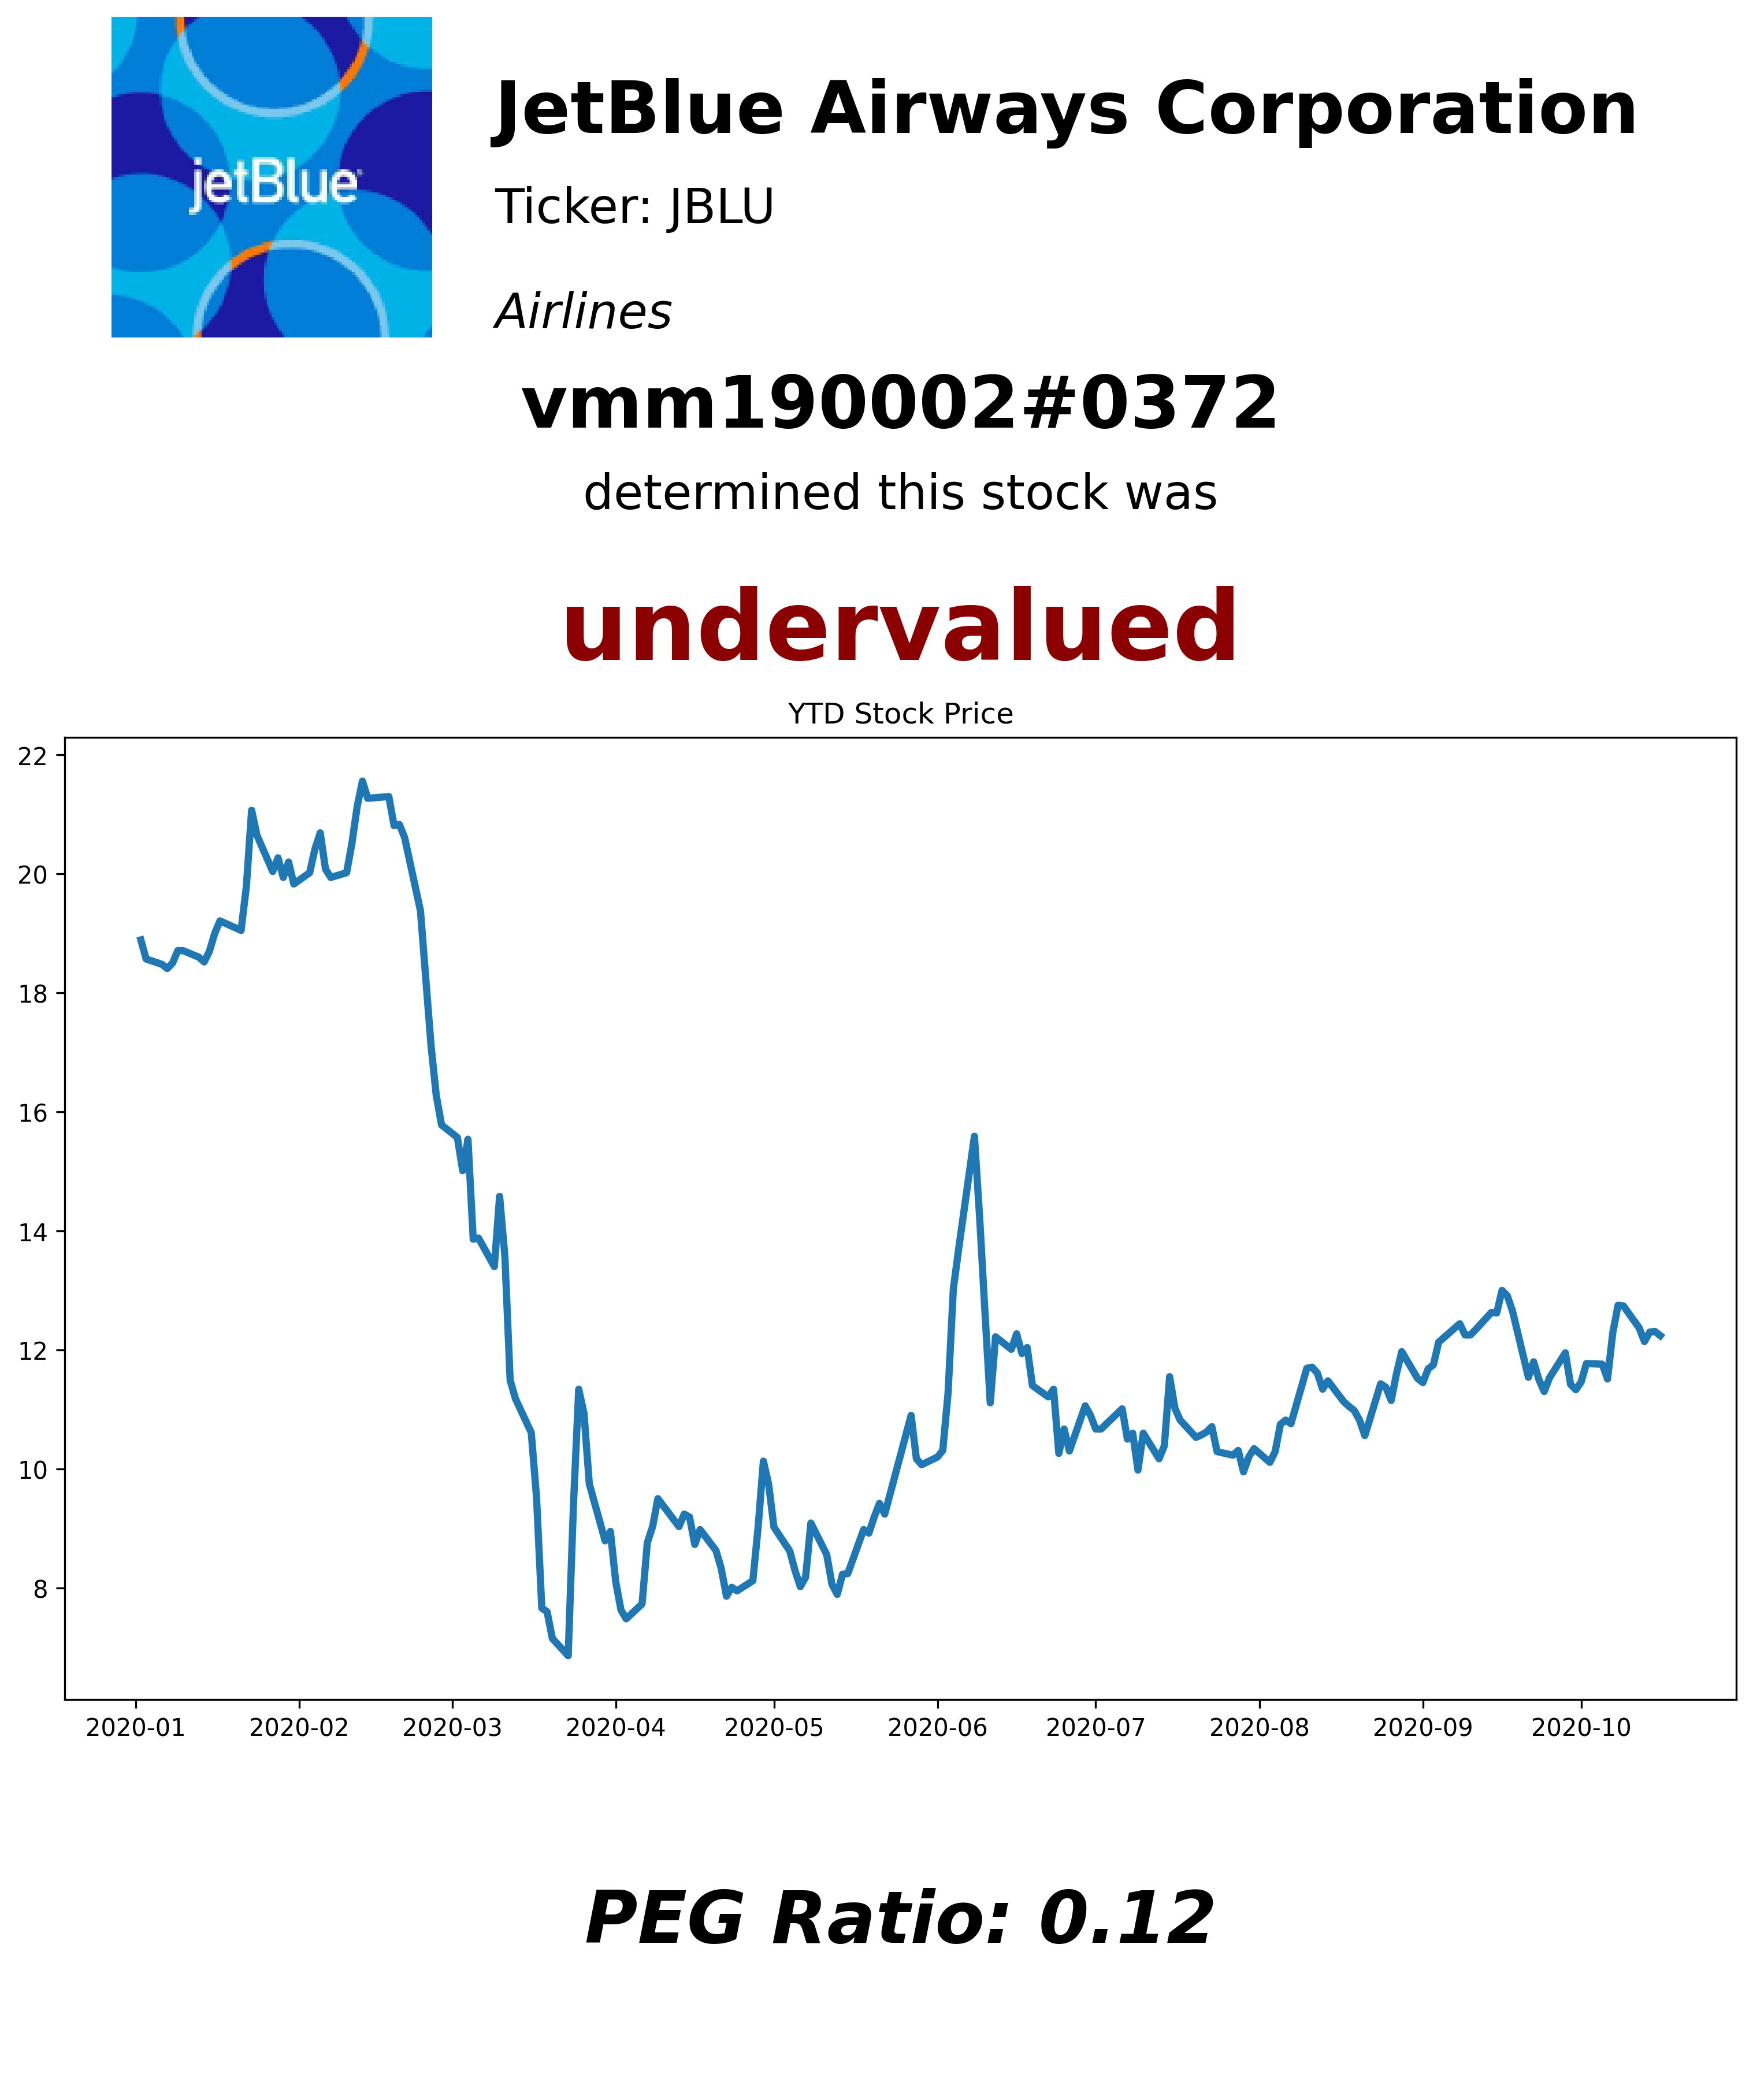

In [28]:
# Run this cell to generate an infographic. See TrackIT to learn how it works!
# DO NOT MODIFY
# Supplementary code to generate infographic
import urllib.request
import matplotlib.image as mpimg

# save_graph method
"""
save_graph()
- Generates an infographic.
"""
def save_graph(ticker, price_history, logo_url, short_name, industry, discord_tag, overvalued, peg_ratio):
    ov_txt = 'overvalued' if overvalued else 'undervalued'
    # avoid axis overlap
    fig = plt.figure(figsize=(10,12), dpi=300, constrained_layout=True)
    # Use GridSpec for customising layout
    gs = fig.add_gridspec(nrows=6, ncols=4)
    # Logo image
    logo_image = fig.add_subplot(gs[0, 0])
    logo_image.axis('off')
    urllib.request.urlretrieve(logo_url, 'logo.png')
    stock_image = plt.imread('logo.png')
    logo_image.imshow(stock_image)
    # Text
    text = fig.add_subplot(gs[0, 1:])
    text.axis('off')
    text.text(0, 0.7, short_name, horizontalalignment='left', verticalalignment='center', fontsize=30, fontweight='bold')
    text.text(0, 0.4, f'Ticker: {ticker}', horizontalalignment='left', verticalalignment='center', fontsize=20)
    text.text(0, 0.0, f'{industry}', horizontalalignment='left', verticalalignment='bottom', fontsize=20, fontstyle='italic')
    # Overvalued?
    ov = fig.add_subplot(gs[1, :])
    ov.axis('off')
    ov.text(0.5, 0.85, f'{discord_tag}', horizontalalignment='center', verticalalignment='center', fontsize=30, fontweight='bold')
    ov.text(0.5, 0.65, f'determined this stock was', horizontalalignment='center', verticalalignment='top', fontsize=20)
    ov.text(0.5, 0.00, f'{ov_txt}', horizontalalignment='center', verticalalignment='bottom', fontsize=40, fontweight='bold', color='darkred')
    # Graph
    stock_graph = fig.add_subplot(gs[2:5, :])
    stock_graph.set_title('YTD Stock Price')
    stock_graph.plot(price_history.index, price_history['Close'], linewidth=3)
    # PEG ratio
    peg = fig.add_subplot(gs[5, :])
    peg.axis('off')
    peg.text(0.5, 0.5, f'PEG Ratio: {peg_ratio}', horizontalalignment='center', verticalalignment='center', fontsize=30, fontstyle='italic', fontweight='bold')
    plt.savefig(f'{ticker}.png', facecolor='white', transparent=True, bbox_inches='tight')

save_graph(ticker, price_history, logo_url, shortName, industry, discord_tag, overvalued, pegRatio)